Задание
1. Реализовать модель предпочительного присоединения для числа объектов ď 2500. В
качестве параметра использовать вероятность p создания новой структуры;
2. Исследовать макроскопические параметры модели предпочтительного присоединения:
найти показатель распределения a и его зависимость от параметра p

p=0.05, alpha=0.49
p=0.11, alpha=0.71
p=0.18, alpha=0.86
p=0.24, alpha=1.03
p=0.31, alpha=1.21
p=0.37, alpha=1.37
p=0.44, alpha=1.56
p=0.50, alpha=1.80
p=0.56, alpha=2.05
p=0.63, alpha=2.30
p=0.69, alpha=2.61
p=0.76, alpha=2.98
p=0.82, alpha=3.40
p=0.89, alpha=4.21
p=0.95, alpha=5.04


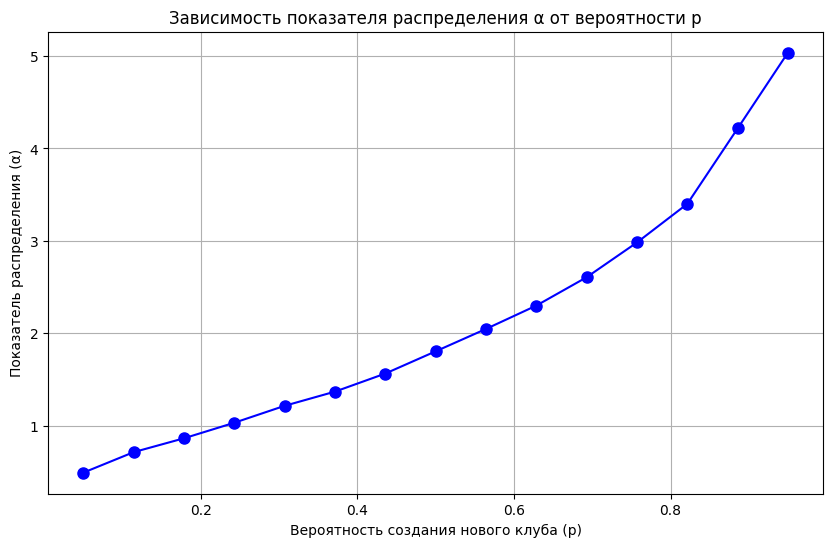

In [1]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def simulate(p, n=2000):
    """Модель предпочтительного присоединения с вероятностью p создания нового клуба."""
    clubs = [1]  # Первый студент создает клуб
    for t in range(2, n + 1):
        if random.random() < p:
            clubs.append(1)  # Создаем новый клуб
        else:
            # Выбираем клуб пропорционально текущим размерам
            chosen_index = random.choices(range(len(clubs)), weights=clubs, k=1)[0]
            clubs[chosen_index] += 1
    return clubs

def calculate_alpha(sizes):
    """Оценка показателя степенного распределения через линейную регрессию."""
    counts = Counter(sizes)
    if len(counts) < 2:
        return np.nan  # Недостаточно данных для регрессии
    # Логарифмируем данные
    x = np.log10(list(counts.keys()))
    y = np.log10(list(counts.values()))
    # Линейная регрессия
    slope, _ = np.polyfit(x, y, 1)
    return -slope  # Показатель alpha

# Параметры исследования
p_values = np.linspace(0.05, 0.95, 15)  # Исключаем крайние значения для устойчивости
alpha_values = []
num_runs = 20  # Количество прогонов для усреднения

for p in p_values:
    alphas = []
    for _ in range(num_runs):
        clubs = simulate(p)
        alpha = calculate_alpha(clubs)
        if not np.isnan(alpha):
            alphas.append(alpha)
    # Усредняем полученные значения alpha
    if alphas:
        avg_alpha = np.mean(alphas)
    else:
        avg_alpha = np.nan
    alpha_values.append(avg_alpha)
    print(f"p={p:.2f}, alpha={avg_alpha:.2f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_values, alpha_values, 'bo-', markersize=8)
plt.xlabel('Вероятность создания нового клуба (p)')
plt.ylabel('Показатель распределения (α)')
plt.title('Зависимость показателя распределения α от вероятности p')
plt.grid(True)
plt.show()